In [1]:
import scirpy as ir

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

In [3]:
from glob import glob
import warnings
import tarfile

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [4]:
import muon as mu

In [5]:
import numpy as np

In [6]:
samples = {
    "10mix1": {"group": "10mix"},
    "10mix2": {"group": "10mix"},
    "11mix1": {"group": "11mix"},
    "11mix2": {"group": "11mix"},
    "GF1": {"group": "GF"},
    "GF2": {"group": "GF"},

}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr = {}
adatas_gex = {}
for sample, sample_meta in samples.items():
    adata_gex = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    adata_gex.var_names_make_unique()
    adatas_tcr[sample] = adata_tcr
    adatas_gex[sample] = adata_gex

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda

In [7]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},


}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr_2021 = {}
adatas_gex_2021 = {}
for sample, sample_meta in samples.items():
    adata_gex_2021 = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr_2021 = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    adata_gex_2021.var_names_make_unique()
    adatas_tcr_2021[sample] = adata_tcr_2021
    adatas_gex_2021[sample] = adata_gex_2021

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/_core/anndata.py:1820

In [8]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},
    "10mix1": {"group": "10mix", "condition":"naive"},
    "10mix2": {"group": "10mix", "condition":"naive"},
    "11mix1": {"group": "11mix", "condition":"naive"},
    "11mix2": {"group": "11mix", "condition":"naive"},
    "GF1": {"group": "GF", "condition":"naive"},
    "GF2": {"group": "GF", "condition":"naive"},
}    

In [9]:
# Merge anndata objects
adata_gex = anndata.concat(adatas_gex, index_unique="_")
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

In [10]:
# Merge anndata objects
adata_gex_2021 = anndata.concat(adatas_gex_2021, index_unique="_")
adata_tcr_2021 = anndata.concat(adatas_tcr_2021, index_unique="_")

In [11]:
adata_gex_merge = anndata.concat([adata_gex,adata_gex_2021], index_unique="_")
adata_tcr_merge = anndata.concat([adata_tcr,adata_tcr_2021], index_unique="_")

In [12]:
# Set global met'adata on `mdata.obs`
adata_gex_merge.obs["sample"] = adata_gex_merge.obs_names.to_series().str.split("_", expand=True)[1]
adata_gex_merge.obs["group"] = adata_gex_merge.obs["sample"].map(lambda x: samples[x]["group"])
adata_gex_merge.obs["condition"] = adata_gex_merge.obs["sample"].map(lambda x: samples[x]["condition"])

In [13]:
adata_gex_merge.obs

sample    group condition
AAACCTGAGTCTTGCA-1_10mix1_0              10mix1    10mix     naive
AAACCTGAGTTAAGTG-1_10mix1_0              10mix1    10mix     naive
AAACCTGCAGGATCGA-1_10mix1_0              10mix1    10mix     naive
AAACCTGCATAACCTG-1_10mix1_0              10mix1    10mix     naive
AAACCTGCATACCATG-1_10mix1_0              10mix1    10mix     naive
...                                         ...      ...       ...
TTTGTCATCCCTTGCA-1_GF-ICI2-plus_1  GF-ICI2-plus  GF-plus       ICI
TTTGTCATCGTTGCCT-1_GF-ICI2-plus_1  GF-ICI2-plus  GF-plus       ICI
TTTGTCATCTAACTGG-1_GF-ICI2-plus_1  GF-ICI2-plus  GF-plus       ICI
TTTGTCATCTCTGTCG-1_GF-ICI2-plus_1  GF-ICI2-plus  GF-plus       ICI
TTTGTCATCTGTTGAG-1_GF-ICI2-plus_1  GF-ICI2-plus  GF-plus       ICI

[91098 rows x 3 columns]

In [14]:
adata_gex_merge.var

Empty DataFrame
Columns: []
Index: [Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15, Lypla1, Tcea1, Rgs20, Gm16041, Atp6v1h, Oprk1, Npbwr1, Rb1cc1, 4732440D04Rik, Alkal1, St18, Pcmtd1, Gm26901, Gm30414, Sntg1, Rrs1, Adhfe1, 2610203C22Rik, Vxn, Gm29520, Mybl1, Vcpip1, 1700034P13Rik, Sgk3, Mcmdc2, Snhg6, Tcf24, Ppp1r42, Gm15818, Cops5, Cspp1, Arfgef1, Cpa6, Prex2, A830018L16Rik, Gm17644, Gm29663, Sulf1, Slco5a1, Gm29283, Prdm14, Ncoa2, Gm29570, Tram1, Lactb2, Xkr9, Eya1, Gm9947, Msc, Trpa1, Kcnb2, Terf1, Sbspon, 4930444P10Rik, Rpl7, Rdh10, Gm28095, Stau2, Gm7568, Ube2w, Eloc, D030040B21Rik, Tmem70, Ly96, Gm28376, Jph1, Gm28783, Gdap1, Gm28784, Pi15, Gm28154, Gm16070, Crispld1, Gm28153, Gm28756, Crisp4, Defb18, Defb41, Gm15825, Tfap2d, Tfap2b, Gm28340, Pkhd1, 4930486I03Rik, Gm28653, Il17a, Il17f, Mcm3, Gm28065, 6720483E21Rik, Paqr8, ...]

[32285 rows x 0 columns]

In [15]:
adata_tcr_merge.obs

Empty DataFrame
Columns: []
Index: [AAACCTGAGTCTTGCA-1_10mix1_0, AAACCTGAGTTAAGTG-1_10mix1_0, AAACCTGCAGGATCGA-1_10mix1_0, AAACCTGCATACCATG-1_10mix1_0, AAACCTGCATTGAGCT-1_10mix1_0, AAACCTGGTGTGCCTG-1_10mix1_0, AAACCTGTCGCCCTTA-1_10mix1_0, AAACCTGTCTTAACCT-1_10mix1_0, AAACGGGCAAGGGTCA-1_10mix1_0, AAACGGGCAAGGTTCT-1_10mix1_0, AAACGGGGTATTACCG-1_10mix1_0, AAACGGGGTCGAGATG-1_10mix1_0, AAAGATGAGATCCCAT-1_10mix1_0, AAAGATGGTAGAGGAA-1_10mix1_0, AAAGATGGTCCATCCT-1_10mix1_0, AAAGATGTCACTCCTG-1_10mix1_0, AAAGATGTCGGCCGAT-1_10mix1_0, AAAGATGTCTCTAAGG-1_10mix1_0, AAAGCAAAGACACGAC-1_10mix1_0, AAAGCAAAGACTAAGT-1_10mix1_0, AAAGCAACAGACACTT-1_10mix1_0, AAAGCAACAGCTCGCA-1_10mix1_0, AAAGCAACATAACCTG-1_10mix1_0, AAAGCAACATCGGTTA-1_10mix1_0, AAAGCAAGTCAGAAGC-1_10mix1_0, AAAGCAATCTTACCTA-1_10mix1_0, AAAGTAGAGACACTAA-1_10mix1_0, AAAGTAGAGAGGTACC-1_10mix1_0, AAAGTAGAGGACCACA-1_10mix1_0, AAAGTAGCAAGCCGCT-1_10mix1_0, AAAGTAGCAAGCTGTT-1_10mix1_0, AAAGTAGCAGCCTGTG-1_10mix1_0, AAAGTAGGTCACACGC-1_10mix1_0, AAAGTAGGTTCCGTCT-1_10mix1_0, AAATGCCAGTAGCCGA-1_10mix1_0, AAATGCCCACGTGAGA-1_10mix1_0, AAATGCCCAGTCACTA-1_10mix1_0, AAATGCCGTGCATCTA-1_10mix1_0, AAATGCCGTGGGTATG-1_10mix1_0, AAATGCCTCCAAACTG-1_10mix1_0, AACACGTAGATGTGGC-1_10mix1_0, AACACGTAGCTATGCT-1_10mix1_0, AACACGTAGTACGACG-1_10mix1_0, AACACGTAGTGCCAGA-1_10mix1_0, AACACGTCACATTAGC-1_10mix1_0, AACACGTGTAGCTAAA-1_10mix1_0, AACACGTTCACTCCTG-1_10mix1_0, AACCATGAGCCACGTC-1_10mix1_0, AACCATGAGCTGCGAA-1_10mix1_0, AACCATGCACCCTATC-1_10mix1_0, AACCATGGTCTGCAAT-1_10mix1_0, AACCATGTCTAACCGA-1_10mix1_0, AACCGCGAGGACACCA-1_10mix1_0, AACCGCGCAATCTACG-1_10mix1_0, AACCGCGCACCGATAT-1_10mix1_0, AACCGCGCAGGTTTCA-1_10mix1_0, AACCGCGCATGGTAGG-1_10mix1_0, AACCGCGGTTAAGACA-1_10mix1_0, AACCGCGTCGGAATCT-1_10mix1_0, AACCGCGTCGGCGCAT-1_10mix1_0, AACCGCGTCTTACCGC-1_10mix1_0, AACGTTGAGATCGGGT-1_10mix1_0, AACGTTGGTCGCTTCT-1_10mix1_0, AACGTTGTCATACGGT-1_10mix1_0, AACGTTGTCCGAGCCA-1_10mix1_0, AACGTTGTCGTAGGAG-1_10mix1_0, AACTCAGAGTGCCATT-1_10mix1_0, AACTCAGCAGGCTCAC-1_10mix1_0, AACTCAGCATGTCTCC-1_10mix1_0, AACTCAGCATTTCACT-1_10mix1_0, AACTCAGGTGTATGGG-1_10mix1_0, AACTCAGGTGTCAATC-1_10mix1_0, AACTCAGTCAGTGTTG-1_10mix1_0, AACTCAGTCGCGTTTC-1_10mix1_0, AACTCCCAGAGAGCTC-1_10mix1_0, AACTCCCAGCAGGCTA-1_10mix1_0, AACTCCCGTGAAAGAG-1_10mix1_0, AACTCCCGTTACCGAT-1_10mix1_0, AACTCCCGTTAGTGGG-1_10mix1_0, AACTCTTAGGCTCTTA-1_10mix1_0, AACTCTTTCCAAAGTC-1_10mix1_0, AACTGGTAGACTAAGT-1_10mix1_0, AACTGGTAGGAACTGC-1_10mix1_0, AACTGGTAGGTGCTAG-1_10mix1_0, AACTGGTTCGACAGCC-1_10mix1_0, AACTGGTTCTATCGCC-1_10mix1_0, AACTGGTTCTCATTCA-1_10mix1_0, AACTTTCAGATCTGCT-1_10mix1_0, AACTTTCAGCTGAAAT-1_10mix1_0, AACTTTCAGTACATGA-1_10mix1_0, AACTTTCCAAGTTCTG-1_10mix1_0, AACTTTCGTAGGACAC-1_10mix1_0, AACTTTCGTCATATCG-1_10mix1_0, AACTTTCGTGGTCCGT-1_10mix1_0, AAGACCTAGCTGATAA-1_10mix1_0, AAGACCTAGGGAAACA-1_10mix1_0, AAGACCTCACCAGATT-1_10mix1_0, AAGACCTGTCCTCCAT-1_10mix1_0, AAGACCTTCTAACGGT-1_10mix1_0, AAGCCGCAGAAGGTTT-1_10mix1_0, ...]

[71512 rows x 0 columns]

In [16]:
adata_tcr_merge.var

Empty DataFrame
Columns: []
Index: []

In [17]:
sc.pp.neighbors(adata_gex, n_pcs=30)
sc.tl.umap(adata_gex)
sc.tl.leiden(adata_gex)

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 32285 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/tmp/ipykernel_27847/2163850787.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_gex)


In [18]:
adata_gex.obs

leiden
AAACCTGAGTCTTGCA-1_10mix1      4
AAACCTGAGTTAAGTG-1_10mix1      8
AAACCTGCAGGATCGA-1_10mix1     13
AAACCTGCATAACCTG-1_10mix1      7
AAACCTGCATACCATG-1_10mix1     13
...                          ...
TTTGCGCTCGGTGTTA-1_GF2         3
TTTGTCAAGGCTAGCA-1_GF2         0
TTTGTCAAGTGCCAGA-1_GF2         2
TTTGTCAAGTTGTCGT-1_GF2         2
TTTGTCATCGATGAGG-1_GF2         3

[18506 rows x 1 columns]

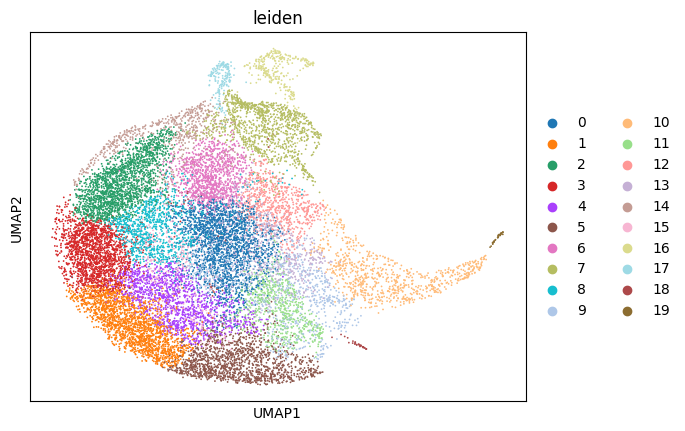

In [19]:
sc.pl.umap(adata_gex, color="leiden")

In [20]:
mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

In [21]:
mdata

MuData object with n_obs × n_vars = 91098 × 32285
  2 modalities
    gex:	91098 x 32285
      obs:	'sample', 'group', 'condition'
    airr:	71512 x 0
      obsm:	'airr'

In [22]:
mdata_2019 = mu.MuData({"gex": adata_gex, "airr": adata_tcr})

In [23]:
mdata_2021 = mu.MuData({"gex": adata_gex_2021, "airr": adata_tcr_2021})

In [24]:
mdata.obs["sample"] = mdata.obs_names.to_series().str.split("_", expand=True)[1]

In [25]:
# Set global met'adata on `mdata.obs`
mdata.obs["sample"] = mdata.obs_names.to_series().str.split("_", expand=True)[1]
mdata.obs["group"] = mdata.obs["sample"].map(lambda x: samples[x]["group"])
mdata.obs["condition"] = mdata.obs["sample"].map(lambda x: samples[x]["condition"])

In [26]:
sc.pp.filter_genes(mdata["gex"], min_cells=10)
sc.pp.filter_cells(mdata["gex"], min_genes=100)

In [27]:
sc.pp.normalize_per_cell(mdata["gex"])
sc.pp.log1p(mdata["gex"])
sc.pp.highly_variable_genes(mdata["gex"], flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(mdata["gex"])
sc.pp.neighbors(mdata["gex"])

In [28]:
sc.tl.umap(mdata["gex"])

In [29]:
sc.tl.leiden(mdata["gex"])

In [30]:
mdata["gex"].var

n_cells  highly_variable     means  dispersions  \
Xkr4                 48            False  0.000368     0.874251   
Gm37381              13             True  0.000137     1.292408   
Rp1                  11             True  0.000092     0.931653   
Mrpl15            32993            False  0.256465     0.570963   
Lypla1            30447            False  0.234750     0.605432   
...                 ...              ...       ...          ...   
AC132444.6           23             True  0.000185     0.937899   
Vamp7             11659            False  0.076372     0.664279   
Tmlhe              1911             True  0.015779     0.917549   
CAAA01147332.1    30994            False  0.255126     0.619704   
AC149090.1        40184             True  0.390093     0.730614   

                dispersions_norm  
Xkr4                    0.611840  
Gm37381                 2.855552  
Rp1                     0.823613  
Mrpl15                 -1.141844  
Lypla1                 -0.745319  
...                          ...  
AC132444.6              0.949452  
Vamp7                  -0.829067  
Tmlhe                   2.178245  
CAAA01147332.1         -0.581131  
AC149090.1              1.347278  

[18327 rows x 5 columns]

In [31]:
mdata["gex"].obs["sample"] = mdata["gex"].obs_names.to_series().str.split("_", expand=True)[1]
mdata["gex"].obs["group"] = mdata["gex"].obs["sample"].map(lambda x: samples[x]["group"])
mdata["gex"].obs["condition"] = mdata["gex"].obs["sample"].map(lambda x: samples[x]["condition"])

In [32]:
def update_columns(row):
   
    if "ICI" not in row['sample']:
        row['origin'] = "colon"
    else:
         row['origin'] = "til"
        
    return row

# Apply the function to each row in the DataFrame
mdata["gex"].obs= mdata["gex"].obs.apply(update_columns, axis=1)

In [33]:
mdata.update()

In [34]:
mu.pp.intersect_obs(mdata)

In [35]:
mdata

MuData object with n_obs × n_vars = 71512 × 18327
  obs:	'sample', 'group', 'condition'
  2 modalities
    gex:	71512 x 18327
      obs:	'sample', 'group', 'condition', 'n_genes', 'n_counts', 'leiden', 'origin'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	71512 x 0
      obsm:	'airr'

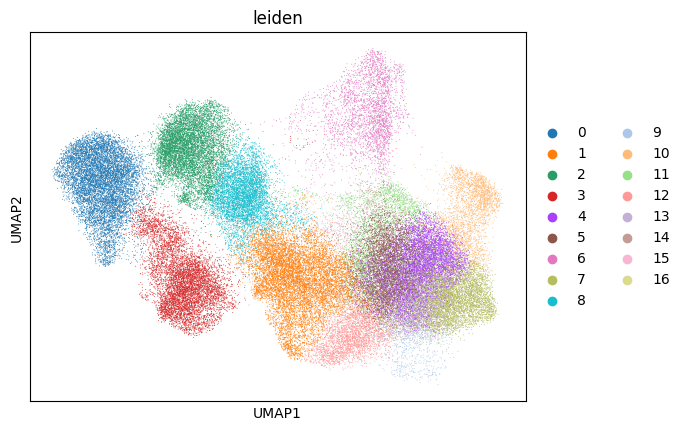

In [36]:
sc.pl.umap(mdata["gex"], color = "leiden")

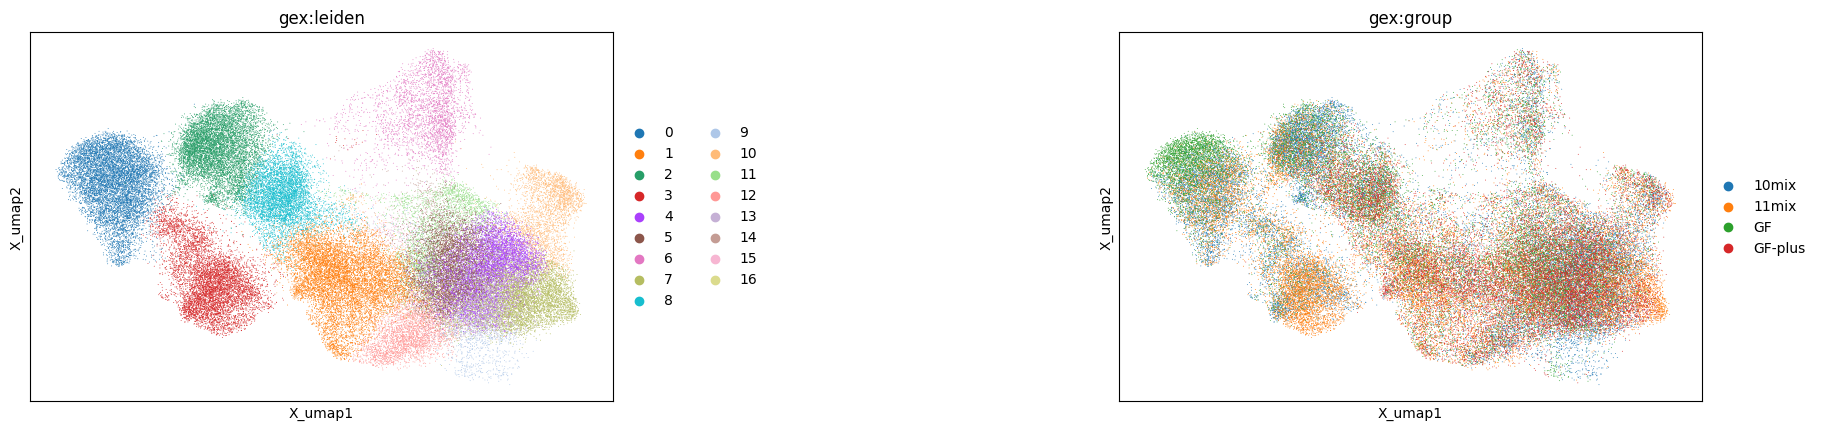

In [37]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["gex:leiden","gex:group"],
    ncols=3,
    wspace=0.7,
)


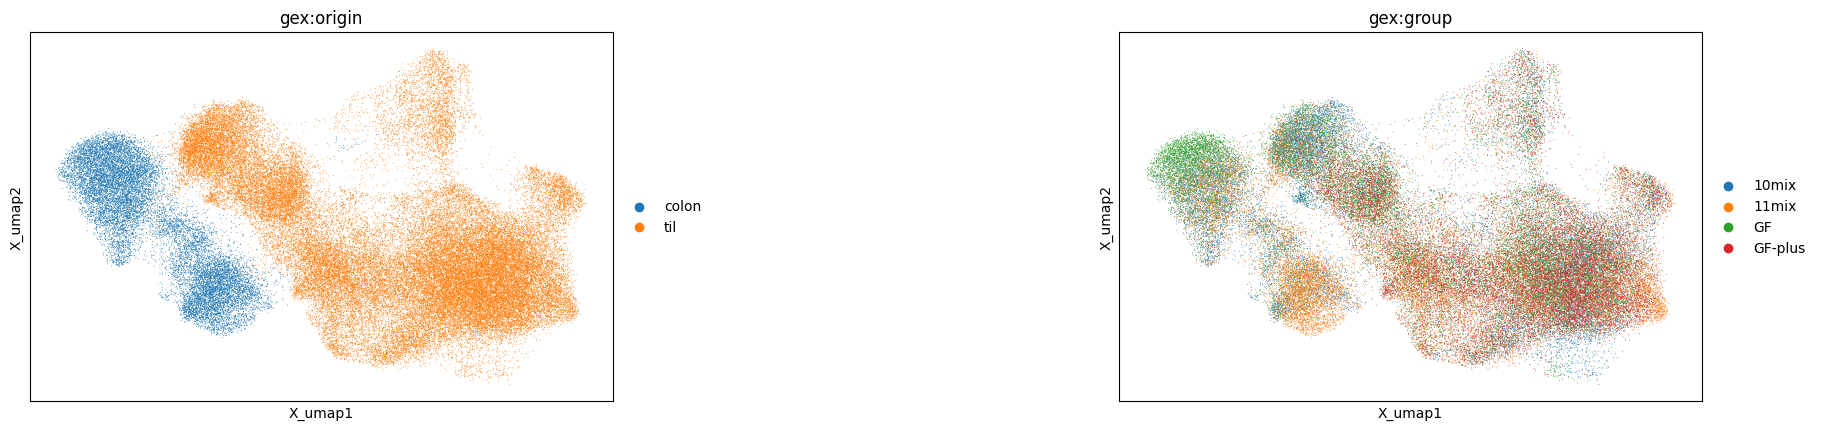

In [38]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["gex:origin","gex:group"],
    ncols=3,
    wspace=0.7,
)


In [39]:
#### cell annotation

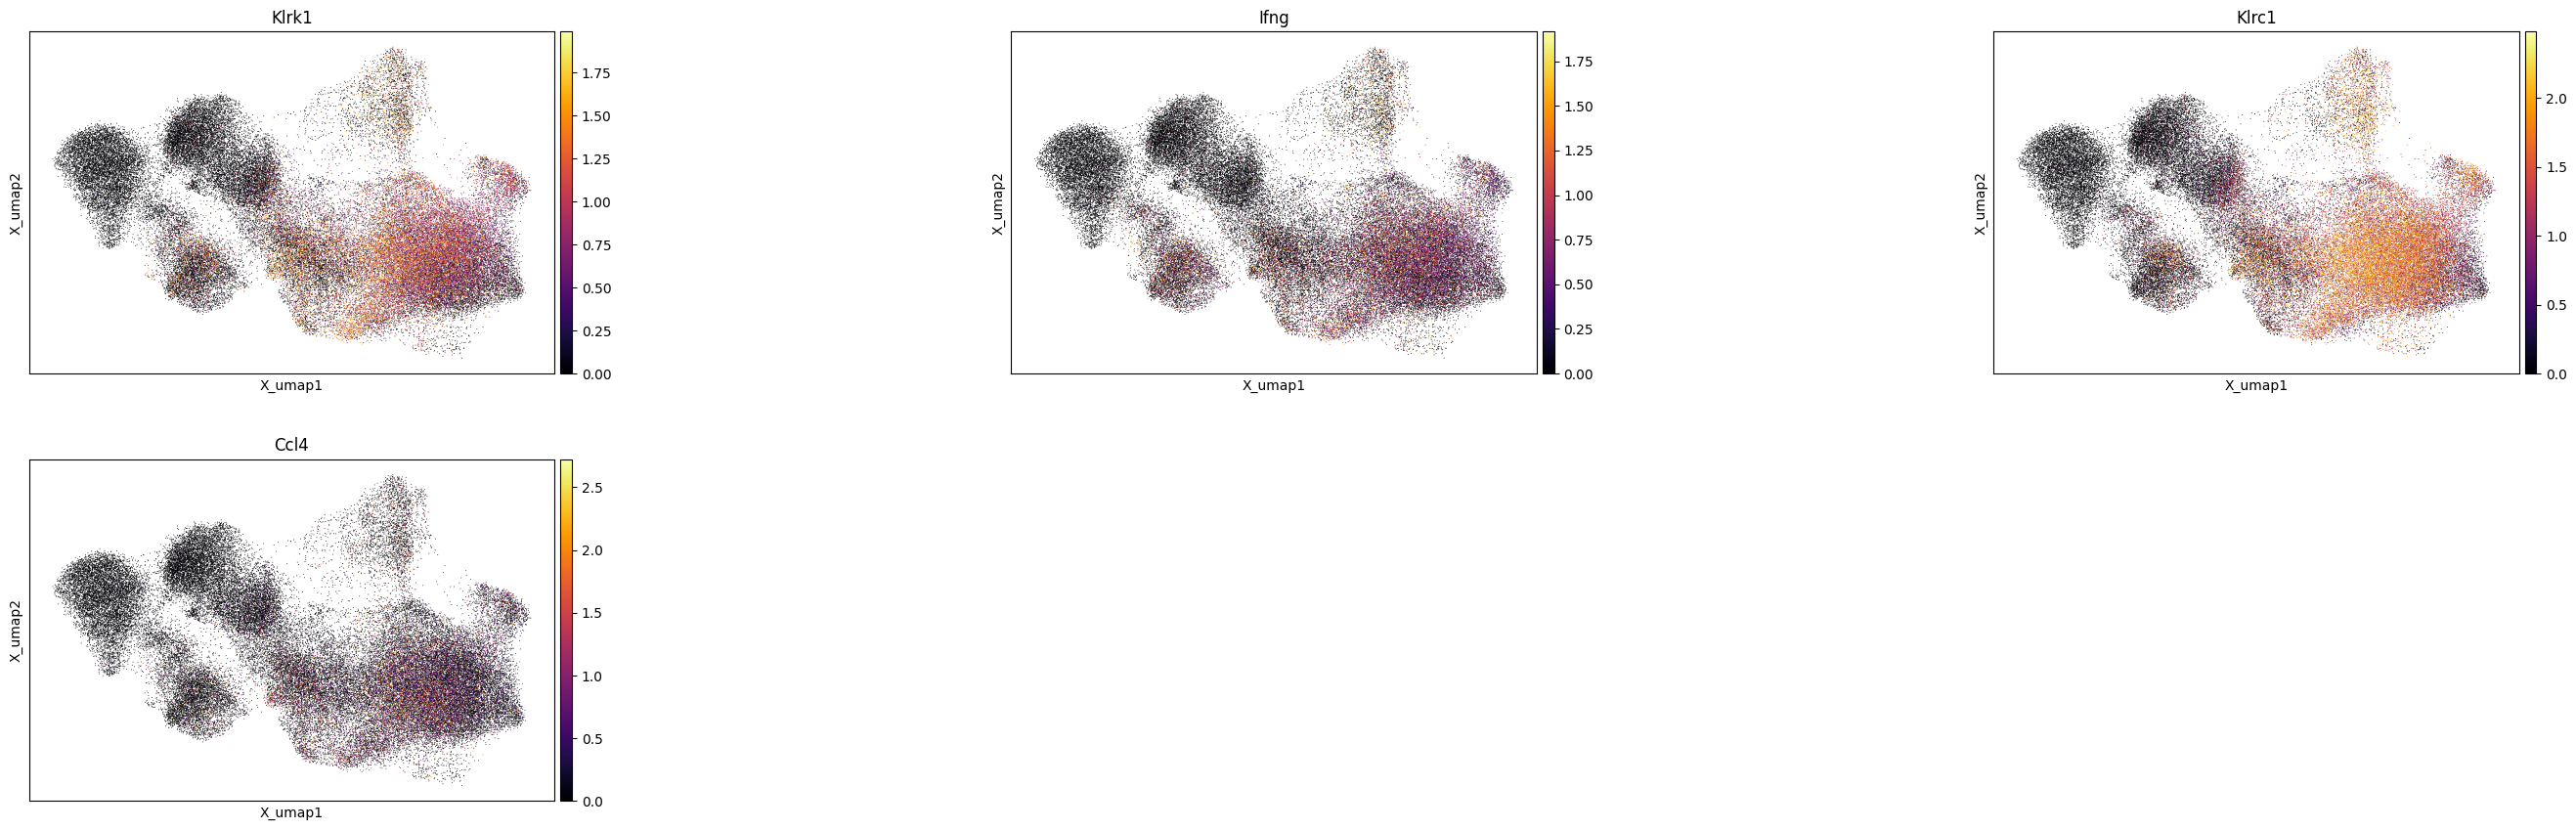

In [40]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["Klrk1","Ifng","Klrc1","Ccl4"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)


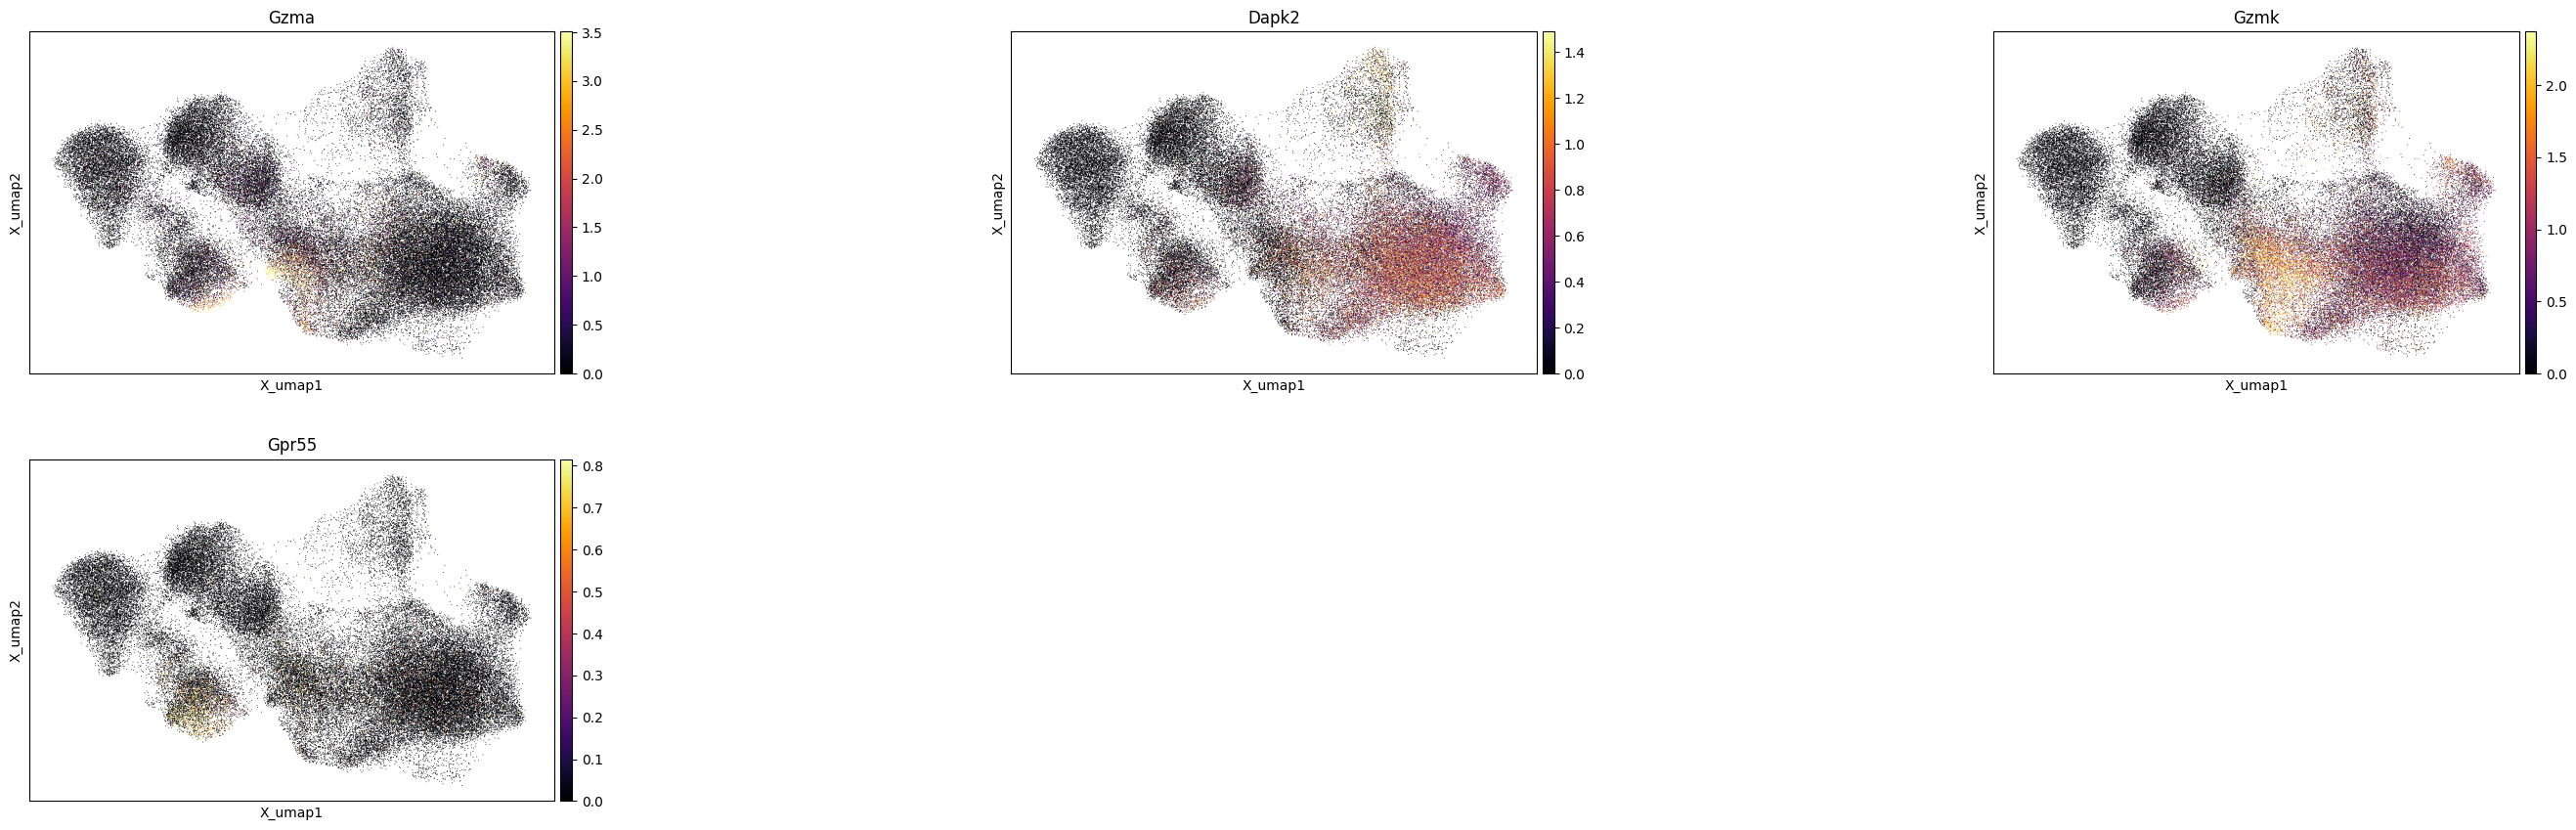

In [41]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["Gzma","Dapk2","Gzmk","Gpr55"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)


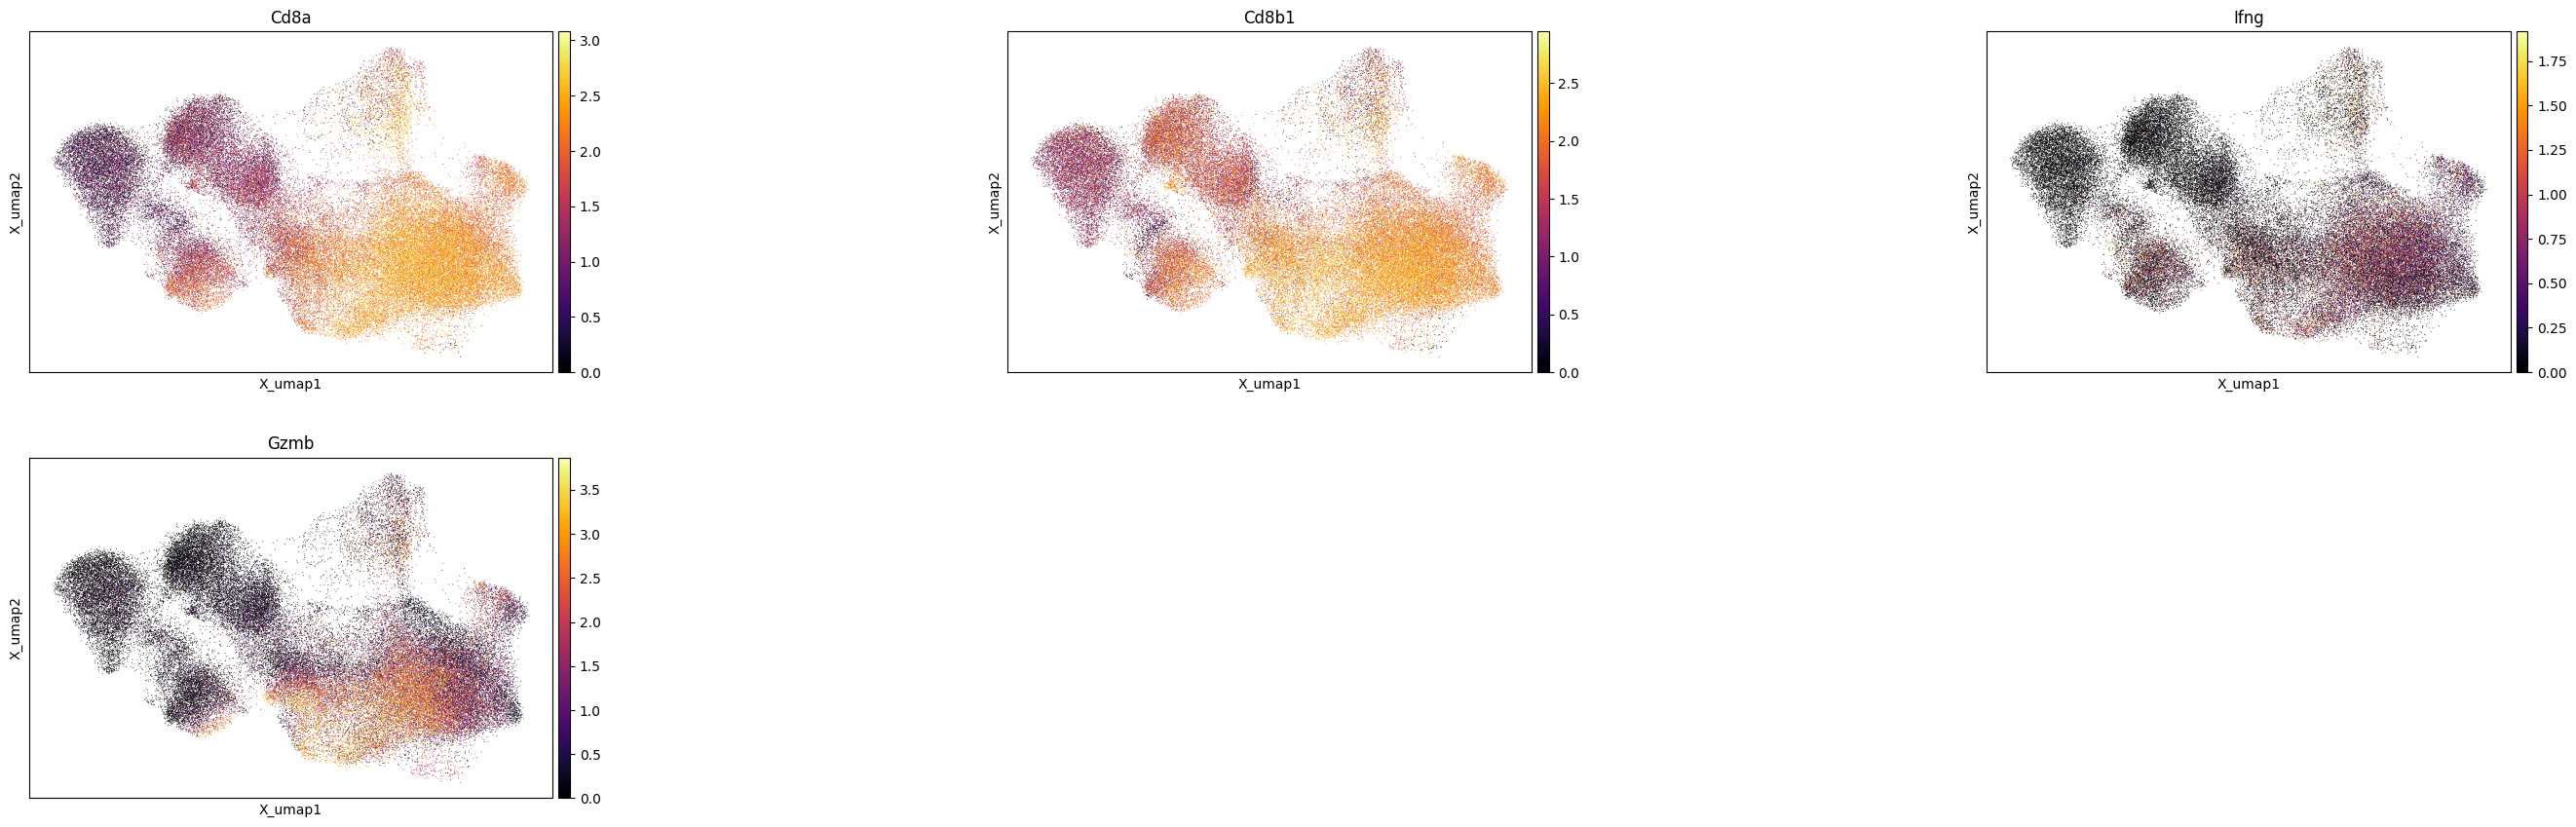

In [42]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["Cd8a","Cd8b1","Ifng","Gzmb"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)


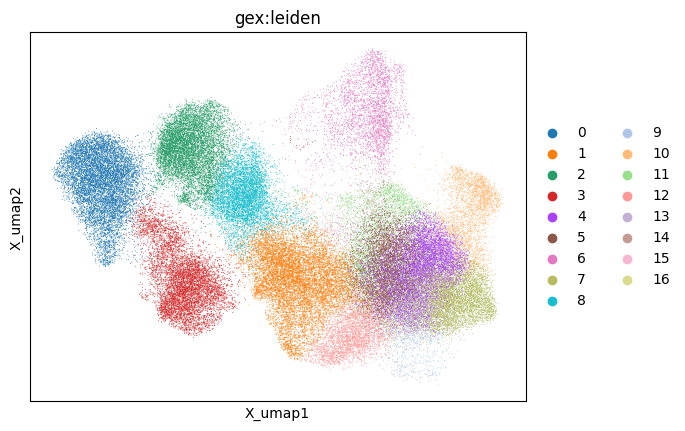

In [43]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["gex:leiden"],
    ncols=3,
    wspace=0.7,
)

In [44]:
# mitochondrial genes
mdata["gex"].var["mt"] = mdata.var_names.str.startswith("mt-")


In [45]:
sc.pp.calculate_qc_metrics(
    mdata["gex"], qc_vars=["mt"], inplace=True, percent_top=[20], log1p=True
)

In [46]:
mdata

MuData object with n_obs × n_vars = 71512 × 18327
  obs:	'sample', 'group', 'condition'
  2 modalities
    gex:	71512 x 18327
      obs:	'sample', 'group', 'condition', 'n_genes', 'n_counts', 'leiden', 'origin', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'gex:leiden_colors', 'gex:group_colors', 'gex:origin_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	71512 x 0
      obsm:	'airr'

<Axes: title={'center': 'n_genes'}, xlabel='UMAP1', ylabel='UMAP2'>

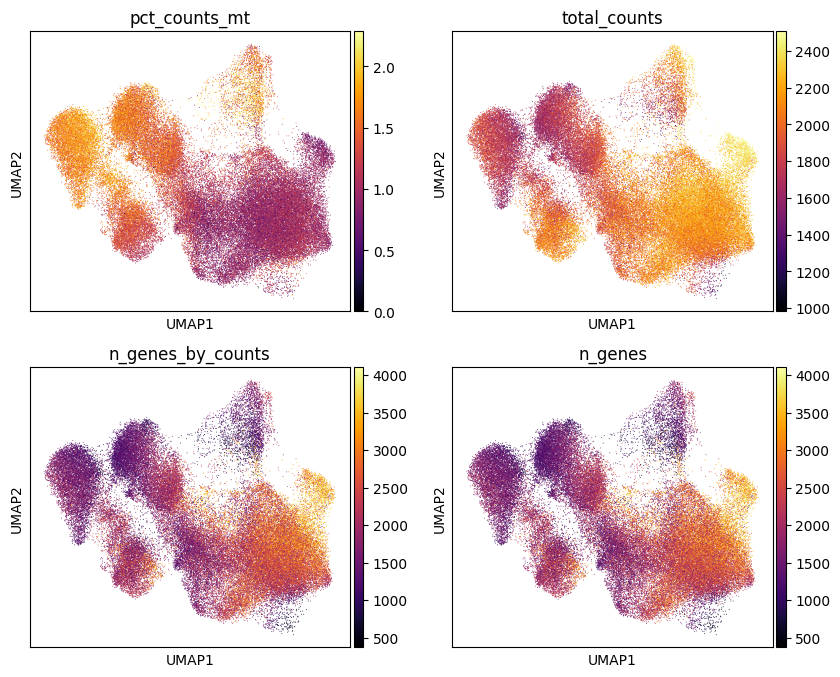

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes=axes.flatten()
sc.pl.umap(
    mdata["gex"],
    color="pct_counts_mt",
    cmap="inferno",
    vmin=0,
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[0],
)
sc.pl.umap(
    mdata["gex"],
    color="total_counts",
    cmap="inferno",
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[1],
)
sc.pl.umap(
    mdata["gex"],
    color="n_genes_by_counts",
    cmap="inferno",
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[2],
)
sc.pl.umap(
    mdata["gex"],
    color="n_genes",
    cmap="inferno",
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[3],
)

In [48]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [49]:

from scipy.stats import median_abs_deviation

In [50]:
mdata["gex"].obs["outlier"] = (
    is_outlier(mdata["gex"], "log1p_total_counts", 1)
    | is_outlier(mdata["gex"], "log1p_n_genes_by_counts", 1)
    | is_outlier(mdata["gex"], "pct_counts_in_top_20_genes",1)
)
mdata["gex"].obs.outlier.value_counts()

outlier
True     48521
False    22991
Name: count, dtype: int64

In [51]:
mdata_qc = mdata["gex"][(~mdata["gex"].obs.outlier)]

In [52]:
mdata_qc

View of AnnData object with n_obs × n_vars = 22991 × 18327
    obs: 'sample', 'group', 'condition', 'n_genes', 'n_counts', 'leiden', 'origin', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'gex:leiden_colors', 'gex:group_colors', 'gex:origin_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

<Axes: title={'center': 'n_genes'}, xlabel='UMAP1', ylabel='UMAP2'>

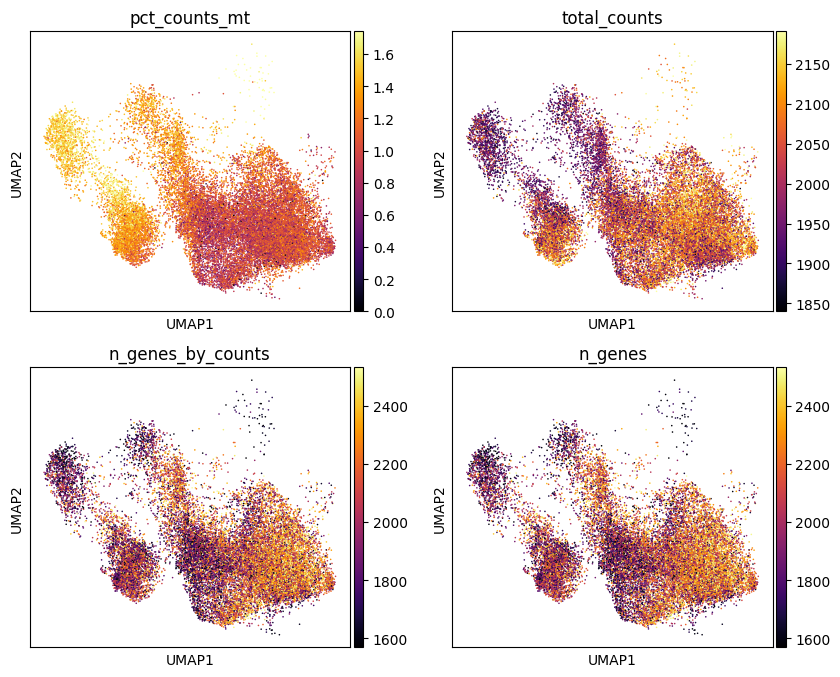

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes=axes.flatten()
sc.pl.umap(
    mdata_qc,
    color="pct_counts_mt",
    cmap="inferno",
    vmin=0,
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[0],
)
sc.pl.umap(
    mdata_qc,
    color="total_counts",
    cmap="inferno",
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[1],
)
sc.pl.umap(
    mdata_qc,
    color="n_genes_by_counts",
    cmap="inferno",
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[2],
)
sc.pl.umap(
    mdata_qc,
    color="n_genes",
    cmap="inferno",
    vmax="p99",
    sort_order=False,
    show=False,
    ax=axes[3],
)

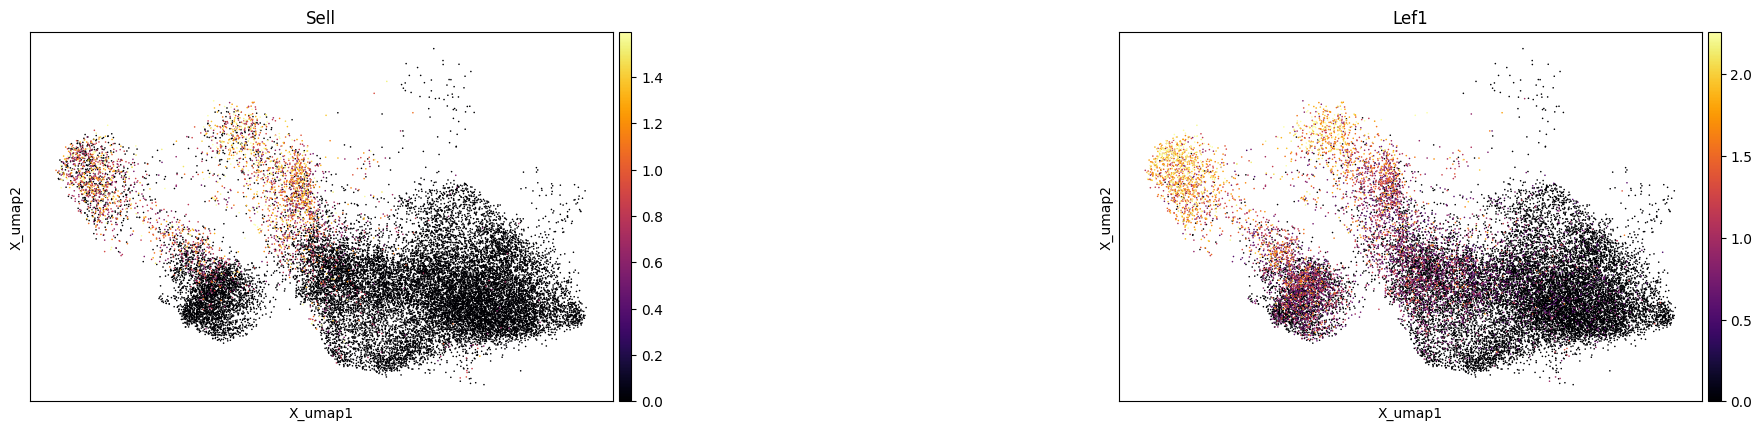

In [54]:
#naive
mu.pl.embedding(
    mdata_qc,
    basis="X_umap",
    color=["Sell","Lef1"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

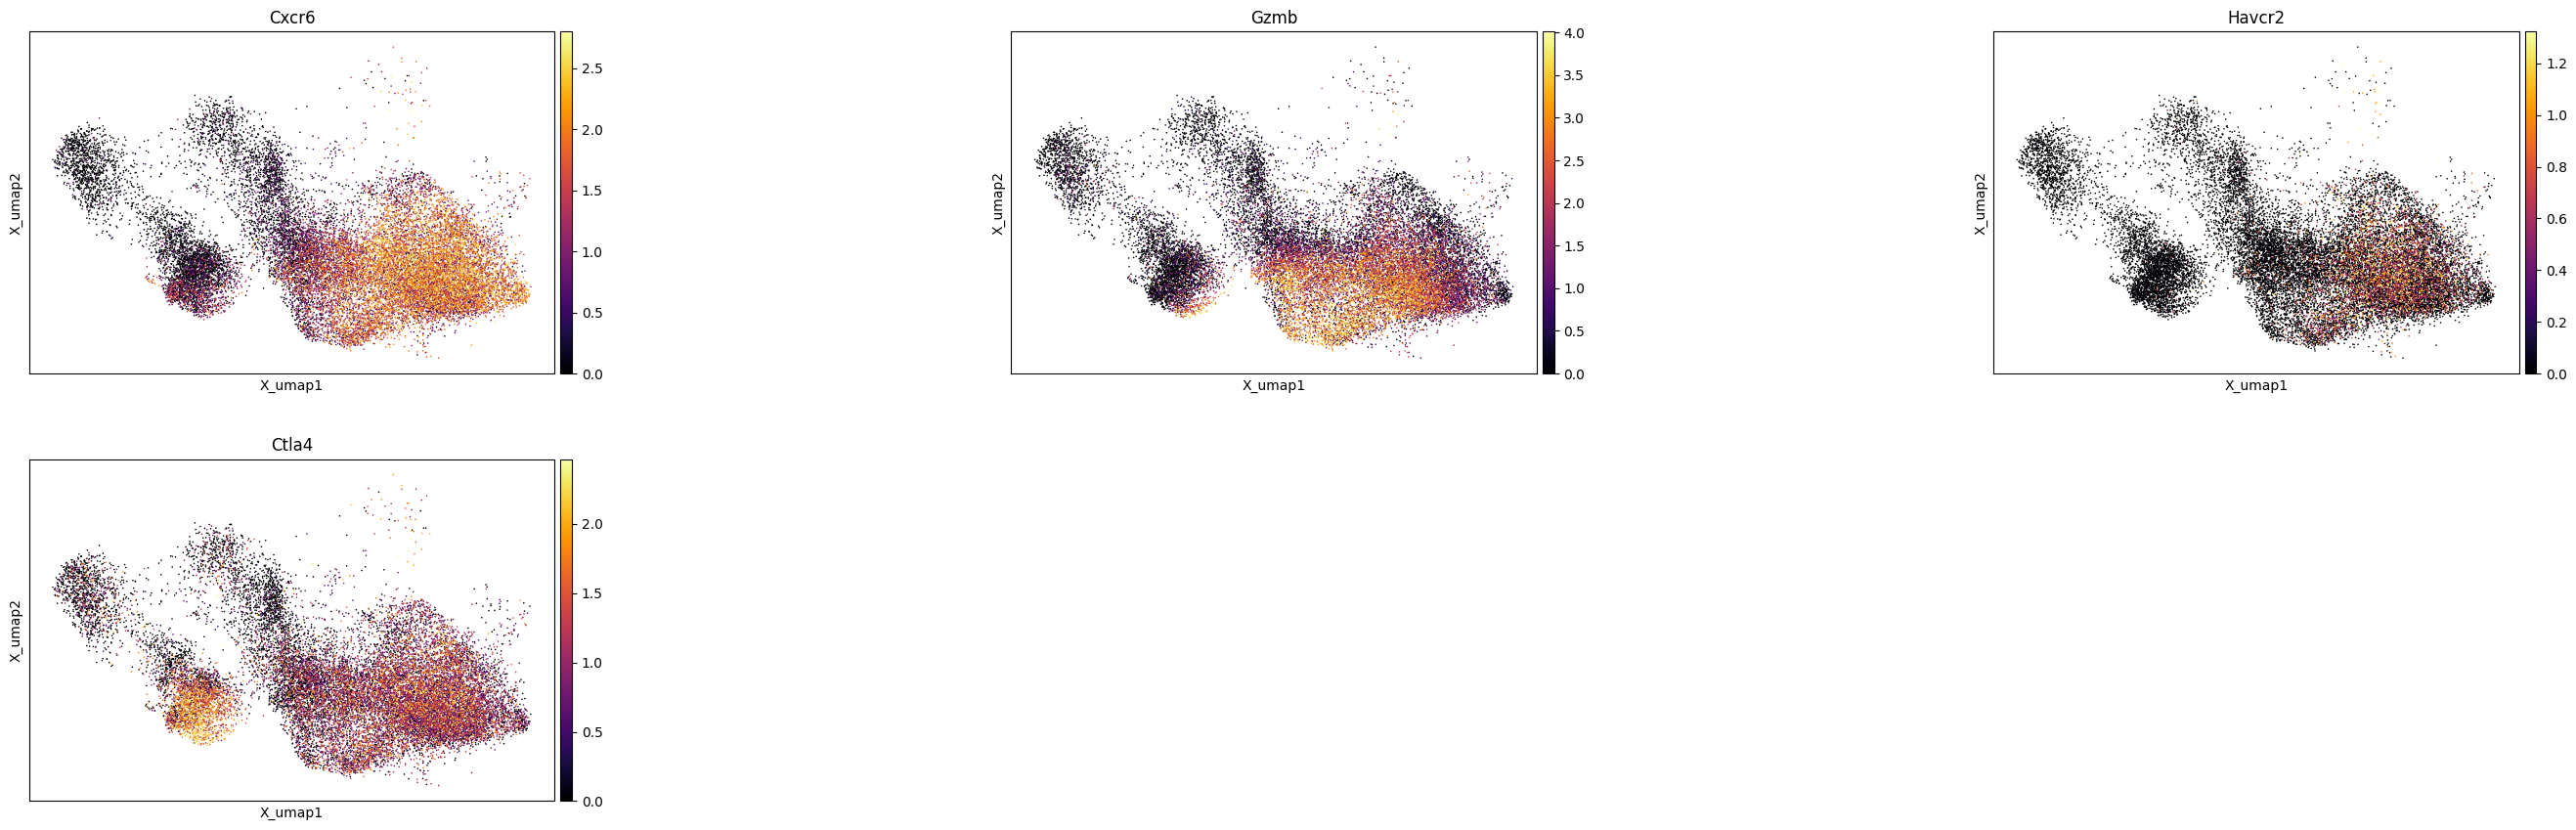

In [55]:
#ex
mu.pl.embedding(
    mdata_qc,
    basis="X_umap",
    color=[ "Cxcr6","Gzmb","Havcr2","Ctla4"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [56]:
#9,13, 00,2,12,3,4,21,1,18,17 tex 
#11,8,5,16,10,6,7 tn

cl_annotation = { 
    "0": "Naive",
    "1": "Resident Memory",
    "3":"Naive",
    "4":"Exhausted",
    "5":"Exhausted",
    "7":"Exhausted",
    "8":"Naive",
    "10":"IFg",
    "11":"Exhausted",

}

In [57]:
mdata["gex"].obs["cell_type_coarse"] = mdata["gex"].obs.leiden.map(cl_annotation)

In [58]:
mdata_2019["gex"].obs["cell_type_coarse"] = mdata_2019["gex"].obs.leiden.map(cl_annotation)

In [61]:
mdata_2019

MuData object with n_obs × n_vars = 18506 × 32285
  2 modalities
    gex:	18506 x 32285
      obs:	'leiden', 'cell_type_coarse'
      uns:	'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    airr:	15207 x 0
      obsm:	'airr'

In [60]:
mdata_2021

MuData object with n_obs × n_vars = 72592 × 32285
  2 modalities
    gex:	72592 x 32285
    airr:	56305 x 0
      obsm:	'airr'

In [59]:
mdata_2021["gex"].obs["cell_type_coarse"] = mdata_2021["gex"].obs.leiden.map(cl_annotation)

AttributeError: 'DataFrame' object has no attribute 'leiden'

In [ ]:
mdata_2021.update()

In [ ]:
mdata_2019.update()

In [ ]:
mdata_qc.obs["cell_type_coarse"] = mdata_qc.obs.leiden.map(cl_annotation)

In [ ]:
naive - 0, 3,8
rm - 10,1
ex - 5,11,7,4
ifg - 

In [ ]:
mdata_qc = mdata_qc[mdata_qc.obs["cell_type_coarse"].isin(['Exhausted', 'Naive', 'Resident Memory'])]
                     

In [ ]:
mdata_qc.write_h5ad("mdata_qc.h5ad")

In [ ]:
set(mdata_qc.obs.cell_type_coarse)

In [ ]:
mu.pl.embedding(
      mdata_qc,
    basis="X_umap",
    color=["cell_type_coarse","origin"],
    ncols=3,
    wspace=0.7,
)

In [ ]:
mu.pl.embedding(
      mdata_qc,
    basis="X_umap",
    color=["cell_type_coarse"],
    ncols=3,
    wspace=0.7,
)

In [ ]:
#rm 


#ex
mu.pl.embedding(
    mdata_qc,
    basis="X_umap",
    color=["Jaml","Prf1","Gzmb"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
#ifg
mu.pl.embedding(
    mdata_qc,
    basis="X_umap",
    color=[ "Isg15","Ifit3","Ifit1","Stat1" ],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
mdata.update()

In [ ]:
Tnaive - Ltb","Sell","Lef1","Nosip -- 3,8
Tex - Cxcr6","Gzmb","Havcr2","Ctla4"
Tsen - Plcg2","Igkc","Klrk1","Slamf7"
Tifn "Isg15","Ifit3","Ifit1","Stat1" 

In [ ]:
#naive
mu.pl.embedding(
    mdata_2021,
    basis="gex:umap",
    color=["Sell","Lef1"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
#rm
mu.pl.embedding(
    mdata_2021,
    basis="gex:umap",
    color=["Jaml","Prf1","Gzmb"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
#ex
mu.pl.embedding(
    mdata_2021,
    basis="gex:umap",
    color=[ "Cxcr6","Gzmb","Havcr2","Ctla4"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
#ifg
mu.pl.embedding(
    mdata_2021,
    basis="gex:umap",
    color=[ "Isg15","Ifit3","Ifit1","Stat1" ],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
#ifg
mu.pl.embedding(
    mdata_2019,
    basis="gex:umap",
    color=[ "Isg15","Stat1","sample"],
    ncols=3,
    wspace=0.7,
    vmax= "p99",
    cmap ="inferno"
)

In [ ]:
mdata

In [ ]:
ir.pp.index_chains(mdata)

In [ ]:
mdata

In [ ]:
ir.tl.chain_qc(mdata)

In [ ]:
set(mdata.obs["gex:sample"])

In [ ]:
mdata_2019  = mdata[mdata.obs["gex:sample"].isin(['10mix1',
 '10mix2',
 '11mix1',
 '11mix2',
  'GF1',
 'GF2'])]

In [ ]:
mdata_2021  = mdata[mdata.obs["gex:sample"].isin(['10mix-ICI1',
 '10mix-ICI2',
 '11mix-ICI1',
 '11mix-ICI2',
 'GF-ICI1',
 'GF-ICI1-plus',
 'GF-ICI2',
 'GF-ICI2-plus'])]

In [ ]:
mdata_2019

In [ ]:
mdata_2021

In [ ]:
_ = ir.pl.group_abundance(mdata_2019, groupby="airr:receptor_subtype", target_col="gex:sample", )

In [ ]:
_ = ir.pl.group_abundance(mdata_2021, groupby="airr:receptor_subtype", target_col="gex:sample", )

In [ ]:
mdata.update()

In [ ]:
_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:cell_type_coarse", )

In [ ]:
_ = ir.pl.group_abundance(mdata_2019, groupby="airr:receptor_subtype", target_col="gex:cell_type_coarse", )

In [ ]:
_ = ir.pl.group_abundance(mdata_2021, groupby="airr:receptor_subtype", target_col="gex:cell_type_coarse", )

In [ ]:
mdata_qc.obs["cell_type_coarse"] = mdata_qc.obs.leiden.map(cl_annotation)

In [ ]:
_ = ir.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:origin")

In [ ]:
_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [ ]:
_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:cell_type_coarse")

In [ ]:
_ = ir.pl.group_abundance(mdata_2019, groupby="airr:chain_pairing", target_col="gex:cell_type_coarse")

In [ ]:
_ = ir.pl.group_abundance(mdata, groupby="gex:cell_type_coarse", target_col="airr:chain_pairing")

In [ ]:
_ = ir.pl.group_abundance(mdata_2019, groupby="gex:cell_type_coarse", target_col="airr:chain_pairing")

In [ ]:
_ = ir.pl.group_abundance(mdata_2021, groupby="gex:cell_type_coarse", target_col="airr:chain_pairing")

In [ ]:
_ = ir.pl.group_abundance(mdata_2021, groupby="airr:chain_pairing", target_col="gex:cell_type_coarse")

In [ ]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(mdata.obs["airr:chain_pairing"].isin(["extra VJ", "extra VDJ", "two full chains", "multichain"]))
        / mdata["airr"].n_obs
    )
)

In [ ]:
mu.pl.embedding(mdata, basis="gex:umap", color="airr:chain_pairing", groups="two full chains")

In [ ]:
#mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "two full chains")

In [ ]:
import numpy as np

In [ ]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))

In [ ]:
mu.pp.filter_obs(mdata_2019, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))

In [ ]:
mu.pp.filter_obs(mdata_2021, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))

In [ ]:
mdata["gex"].var

In [ ]:
ax = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [ ]:
ax = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [ ]:
ax = ir.pl.group_abundance(mdata, groupby="gex:sample", target_col="airr:chain_pairing")

In [ ]:
ax = ir.pl.group_abundance(mdata_2019, groupby="gex:sample", target_col="airr:chain_pairing")

In [ ]:
ax = ir.pl.group_abundance(mdata_2021, groupby="gex:sample", target_col="airr:chain_pairing")

In [ ]:
mdata

In [ ]:
mdata_2019

In [ ]:
mu.pp.intersect_obs(mdata)

In [ ]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(mdata_2019 )

In [ ]:
ir.tl.define_clonotypes(mdata_2019, receptor_arms="all",dual_ir="primary_only")

In [ ]:
mdata["airr"].obs

In [ ]:
mdata["airr"].var

In [ ]:
mdata["gex"]

In [ ]:
sc.pp.neighbors(mdata["airr"])

In [ ]:
muon.tl.leiden(mdata)
muon.tl.umap(mdata)

In [ ]:
mdata["airr"]

In [ ]:
mdata["gex"]

In [ ]:
sc.pl.umap(mdata["gex"], color="Cxcr3")

In [ ]:
sc.pl.umap(mdata["gex"], color="leiden")

In [ ]:
sc.pl.umap(mdata_2019["gex"], color=["Cxcr3","sample"])

In [ ]:
sc.pl.umap(mdata_2021["gex"], color="Cxcr3")

In [ ]:
mdata_2021

In [ ]:
sc.pl.umap(mdata_2019["gex"], color="sample")

### Compositional analysis

In [ ]:
sample

In [ ]:
adata_tumor = adata_gex_merge[(adata_gex_merge.obs["origin"] == "tumor_primary")] #tumor 

In [ ]:
adata_normal = subset_adata[(subset_adata.obs["origin"] == "normal_adjacent")] #normal
adata_normal = adata_normal[(adata_normal.obs["cell_type_major"] != "Tumor cells")] #normal

In [ ]:
set(frac_by_condition.origin)

In [ ]:
frac_by_condition = (
    adata_gex_merge.obs.groupby(["group", "condition"])
    .apply(lambda x: x.value_counts("sample", normalize=False))
    .reset_index(name="n_cells")
    .assign(condition=lambda x: x["group"].astype(str))
)


In [ ]:
frac_pivot = (
    frac_by_condition.pivot(
        index=["group", "condition"],
        columns="sample",
        values="n_cells",
    )
    .reset_index()
    #.drop(columns="other")
)


In [ ]:
data_all = scc_dat.from_pandas(
    frac_pivot, covariate_columns=["donor_id", "dataset", "sex", "tumor_stage","condition","origin"]
)

In [ ]:
data_all.obs["sex"] = pd.Categorical(
    data_all.obs["sex"], categories=["male", "female"]
)

In [ ]:
data_all._sanitize()

In [ ]:
scc_viz.boxplots(data_all, feature_name="sex", figsize=(12, 5), cmap = "inferno")

#plt.savefig( "figures/cell_proportion_tumor_and_normal_sex.png")


In [ ]:
scc_viz.boxplots(data_all, feature_name="origin", figsize=(12, 5), cmap = "inferno")

#plt.savefig( "figures/cell_proportion_tumor_and_normal_origin.png")


In [ ]:
scc_viz.stacked_barplot(data_all, feature_name="sex", figsize = (3,6))
#plt.savefig( "figures/cell_proportion_tumor_and_normal_sex_barplot.png")

In [ ]:
scc_viz.stacked_barplot(data_all, feature_name="origin", figsize = (3,6))
#plt.savefig( "figures/cell_proportion_tumor_and_normal_origin_barplot.png")

In [ ]:
#############################################################

In [ ]:
# Load in the H5AD data
path = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/results_by_sample/merge_and_solo_samples"
adata = sc.read_h5ad(
    f"{path}/adata_nodoublet.h5ad"
)


In [ ]:
adata_vdj_10mix1_2019 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/10mix1/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_10mix2_2019 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/10mix2/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_11mix1_2019 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/11mix1/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_11mix2_2019 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/11mix2/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_GF1_2019 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/GF1/outs/multi/vdj_t/all_contig_annotations.csv")

############ 2021
adata_vdj_10mix_ICI1_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/10mix-ICI1/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_10mix_ICI2_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/10mix-ICI2/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_11mix_ICI1_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/11mix-ICI1/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_11mix_ICI2_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/11mix-ICI2/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_GF_ICI1_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI1/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_GF_ICI2_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI2/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_GF_ICI1_plus_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI1-plus/outs/multi/vdj_t/all_contig_annotations.csv")
adata_vdj_GF_ICI2_plus_2021 = ir.io.read_10x_vdj("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI2-plus/outs/multi/vdj_t/all_contig_annotations.csv")

In [ ]:
adata_gex_10mix1_2019.obs["sample_id"]="10mix1_2019"
adata_gex_10mix2_2019.obs["sample_id"]="10mix2_2019"
adata_gex_11mix1_2019.obs["sample_id"]="11mix1_2019"
adata_gex_11mix2_2019.obs["sample_id"]="11mix2_2019"
adata_gex_GF1_2019.obs["sample_id"]="GF1_2019"


###############################################
adata_gex_10mix_ICI1_2021.obs["sample_id"]="10mix-ICI1_2021"
adata_gex_10mix_ICI2_2021.obs["sample_id"]="10mix-ICI2_2021"
adata_gex_11mix_ICI1_2021.obs["sample_id"]="11mix-ICI1_2021"
adata_gex_11mix_ICI2_2021.obs["sample_id"]="11mix-ICI2_2021"
adata_gex_GF_ICI1_2021.obs["sample_id"]="GF-ICI1_2021"
adata_gex_GF_ICI2_2021.obs["sample_id"]="GF-ICI2_2021"
adata_gex_GF_ICI1_plus_2021.obs["sample_id"]="GF-ICI1_plus_2021"
adata_gex_GF_ICI2_plus_2021.obs["sample_id"]="GF-ICI2_plus_2021"

In [ ]:
adata_gex_10mix1_2019 =sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/10mix1/outs/per_sample_outs/10mix1/count/sample_filtered_feature_bc_matrix")
adata_gex_10mix2_2019 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/10mix2/outs/per_sample_outs/10mix2/count/sample_filtered_feature_bc_matrix")
adata_gex_11mix1_2019 =sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/11mix1/outs/per_sample_outs/11mix1/count/sample_filtered_feature_bc_matrix")
adata_gex_11mix2_2019 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/11mix2/outs/per_sample_outs/11mix2/count/sample_filtered_feature_bc_matrix")
adata_gex_GF1_2019 =sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/GF1/outs/per_sample_outs/GF1/count/sample_filtered_feature_bc_matrix")

############ 2021
adata_gex_10mix_ICI1_2021 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/10mix-ICI1/outs/per_sample_outs/10mix-ICI1/count/sample_filtered_feature_bc_matrix")
adata_gex_10mix_ICI2_2021 =sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/10mix-ICI2/outs/per_sample_outs/10mix-ICI2/count/sample_filtered_feature_bc_matrix")
adata_gex_11mix_ICI1_2021 =sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/11mix-ICI1/outs/per_sample_outs/11mix-ICI1/count/sample_filtered_feature_bc_matrix")
adata_gex_11mix_ICI2_2021 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/11mix-ICI2/outs/per_sample_outs/11mix-ICI2/count/sample_filtered_feature_bc_matrix")
adata_gex_GF_ICI1_2021 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI1/outs/per_sample_outs/GF-ICI1/count/sample_filtered_feature_bc_matrix")
adata_gex_GF_ICI2_2021 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI2/outs/per_sample_outs/GF-ICI2/count/sample_filtered_feature_bc_matrix")
adata_gex_GF_ICI1_plus_2021 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI1-plus/outs/per_sample_outs/GF-ICI1-plus/count/sample_filtered_feature_bc_matrix")
adata_gex_GF_ICI2_plus_2021 = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/GF-ICI2-plus/outs/per_sample_outs/GF-ICI2-plus/count/sample_filtered_feature_bc_matrix")

In [ ]:
adata_vdj_list = [adata_vdj_10mix2_2019,adata_vdj_11mix1_2019,adata_vdj_11mix2_2019,adata_vdj_GF1_2019,adata_vdj_10mix_ICI1_2021,adata_vdj_10mix_ICI2_2021,adata_vdj_11mix_ICI1_2021,adata_vdj_11mix_ICI2_2021,adata_vdj_GF_ICI1_2021,adata_vdj_GF_ICI2_2021,adata_vdj_GF_ICI1_plus_2021,adata_vdj_GF_ICI2_plus_2021]

In [ ]:
adata_vdj = adata_vdj_10mix1_2019.concatenate(adata_vdj_list)

In [ ]:
adata_gex_list = [adata_gex_10mix2_2019,adata_gex_11mix1_2019,adata_gex_11mix2_2019,adata_gex_GF1_2019,adata_gex_10mix_ICI1_2021,adata_gex_10mix_ICI2_2021,adata_gex_11mix_ICI1_2021,adata_gex_11mix_ICI2_2021,adata_gex_GF_ICI1_2021,adata_gex_GF_ICI2_2021,adata_gex_GF_ICI1_plus_2021,adata_gex_GF_ICI2_plus_2021]

In [ ]:
adata_gex = adata_gex_10mix1_2019.concatenate(adata_gex_list)

In [ ]:
adata_vdj.write_h5ad("adata_vdj.h5ad")

In [ ]:
adata_gex.write_h5ad("adata_gex.h5ad")

In [ ]:
adata_vdj

In [ ]:
adata_vdj_10mix1_2019

In [ ]:
adata_gex_10mix1_2019  = sc.read_10x_mtx("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/10mix1/outs/per_sample_outs/10mix1/count/sample_filtered_feature_bc_matrix")

In [ ]:
adata_vdj_10mix1_2019

In [ ]:
adata_vdj_10mix1_2019.obs

In [ ]:
adata_vdj_10mix1_2019.var

In [ ]:
adata_gex_10mix1_2019

In [ ]:
adata_gex_10mix1_2019.obs

In [ ]:
adata_gex_10mix1_2019.var

In [ ]:
pd.DataFrame([x for x in adata_gex_10mix1_2019.var.index[~adata_gex_10mix1_2019.var.gene_ids.str.contains("ENSMUSG")]], columns=['Antibody'])

In [ ]:
mudata_10mix1_2019 = mu.MuData({"gex": adata_gex_10mix1_2019, "airr": adata_vdj_10mix1_2019})

In [ ]:
mudata_10mix1_2019

In [ ]:
mu.pp.intersect_obs(mudata_10mix1_2019)

In [ ]:
mdata = mudata_10mix1_2019

In [ ]:
sc.pp.filter_genes(mdata["gex"], min_cells=10)
sc.pp.filter_cells(mdata["gex"], min_genes=100)
sc.pp.normalize_total(mdata["gex"])
sc.pp.log1p(mdata["gex"])

# Simplified preprocessing steps:
sc.pp.highly_variable_genes(mdata["gex"], n_top_genes=5000)
sc.tl.pca(mdata["gex"])
sc.pp.neighbors(mdata["gex"])

In [ ]:
mdata["gex"].obs["sample_id"] = "10mix_1_2019"

In [ ]:
mdata.update()

In [ ]:
ir.pp.index_chains(mdata)

In [ ]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:sample_id"
)

In [ ]:
_ = ir.pl.group_abundance(
    mdata, groupby="airr:receptor_subtype", target_col="gex:sample_id"
)

In [ ]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")

In [ ]:
_ = ir.pl.group_abundance(
    mdata, groupby="airr:chain_pairing", target_col="gex:sample_id"
)

In [ ]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x == "single pair")

In [ ]:
sc.tl.umap(mdata["gex"])
sc.tl.leiden(mdata["gex"])

In [ ]:
mudata_10mix1_2019

In [ ]:
sc.pl.umap(mdata["gex"], color=["leiden"], wspace=0.3)

In [ ]:
ir.pp.ir_dist(mdata, metric='identity', sequence='nt')

In [ ]:
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

In [ ]:
print(pd.__version__)

In [ ]:
print(sc.__version__)

In [ ]:
import pandas as pd